In [15]:
import pandas as pd

# Read the data into a Pandas DataFrame
data = pd.read_csv('dataset/modelling_data/cases/covid-case-counts.csv',low_memory=False)

# Group the data by 'Report Date' and 'District', summing the 'Number of cases reported'
grouped_data = data.groupby(['Report Date', 'District']).agg({'Number of cases reported': 'sum'}).reset_index()

# Pivot the DataFrame with 'Report Date' as the index, 'District' as columns, and the sum of reported cases as values
pivoted_data = grouped_data.pivot_table(index='Report Date', columns='District', values='Number of cases reported')

# Fill missing values with zeros
pivoted_data.fillna(0, inplace=True)

pivoted_data.reset_index(drop=True, inplace=True)


# Save the preprocessed data to a CSV file without a header
pivoted_data.to_csv('dataset/covid-case-counts-processed.csv', header=False,index=False)

In [16]:
import pandas as pd

# Read the data into a Pandas DataFrame
data = pd.read_csv('dataset/modelling_data/cases/covid-case-counts.csv',low_memory=False)

# Group the data by 'Report Date' and 'District', summing the 'Number of cases reported'
grouped_data = data.groupby(['Report Date', 'District']).agg({'Number of cases reported': 'sum'}).reset_index()

# Pivot the DataFrame with 'Report Date' as the index, 'District' as columns, and the sum of reported cases as values
pivoted_data = grouped_data.pivot_table(index='Report Date', columns='District', values='Number of cases reported')

# Fill missing values with zeros
pivoted_data.fillna(0, inplace=True)



# Save the preprocessed data to a CSV file without a header
pivoted_data.to_csv('dataset/covid-case-counts-processed-plot.csv', header=True,index=True)



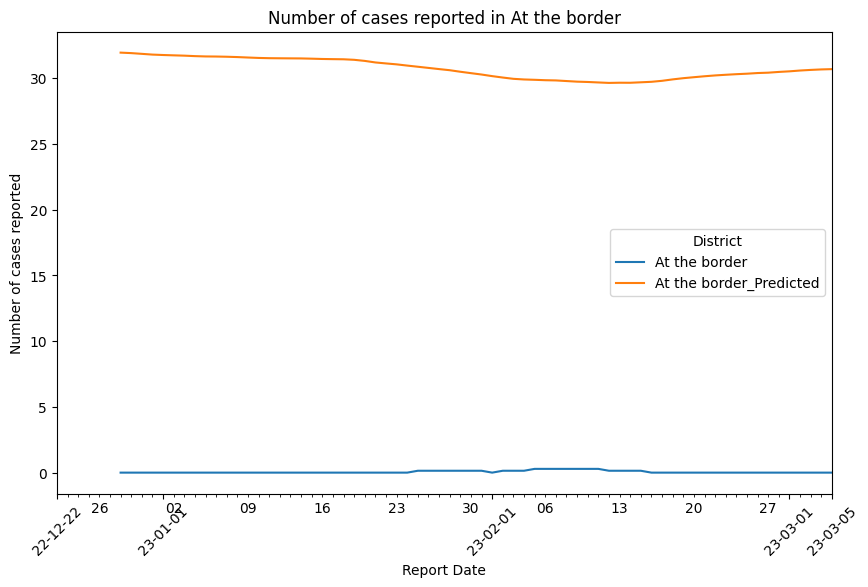

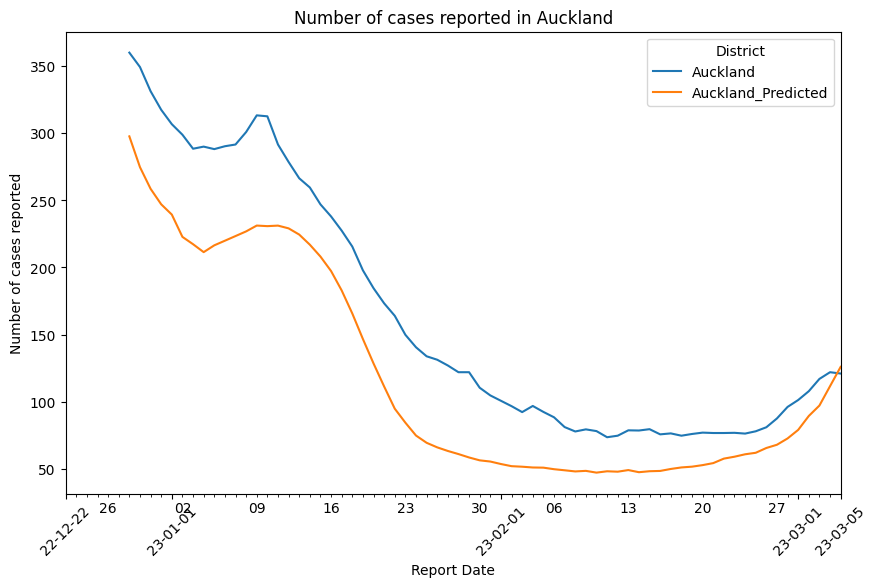

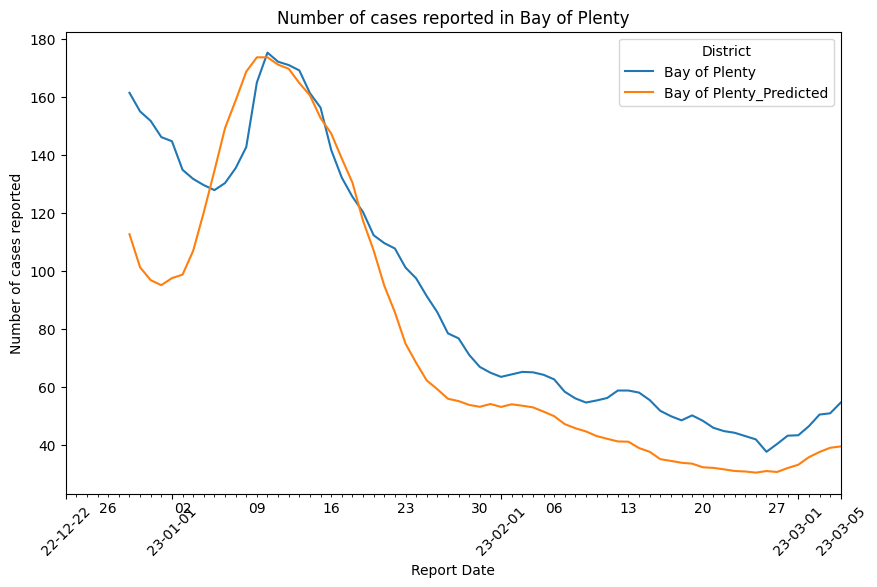

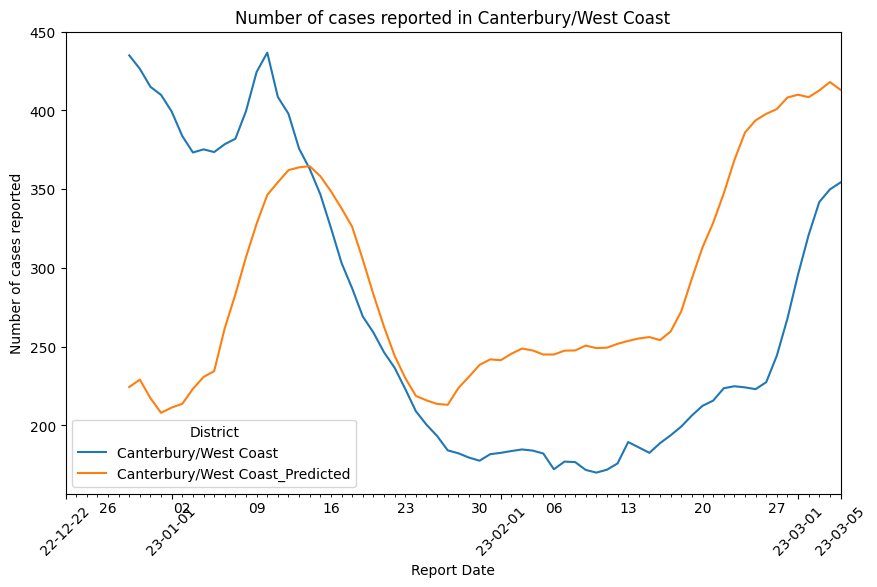

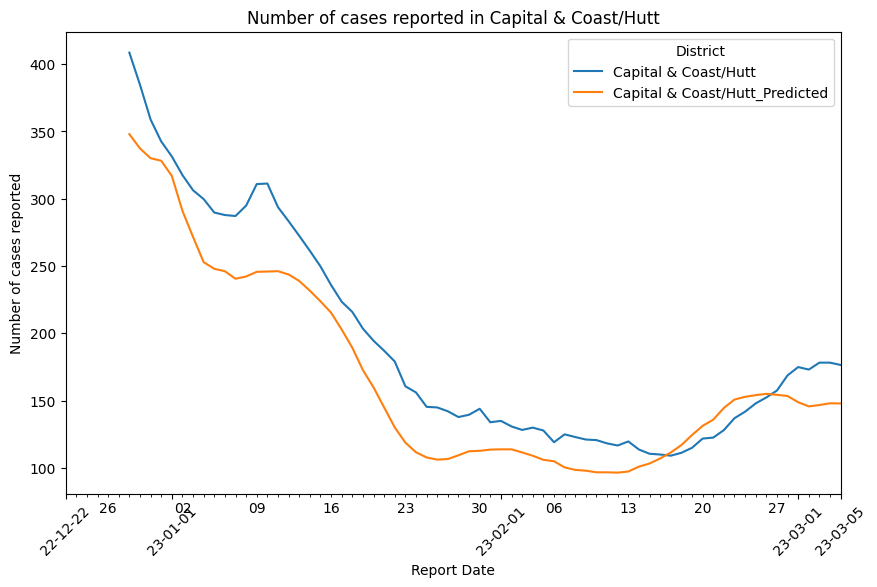

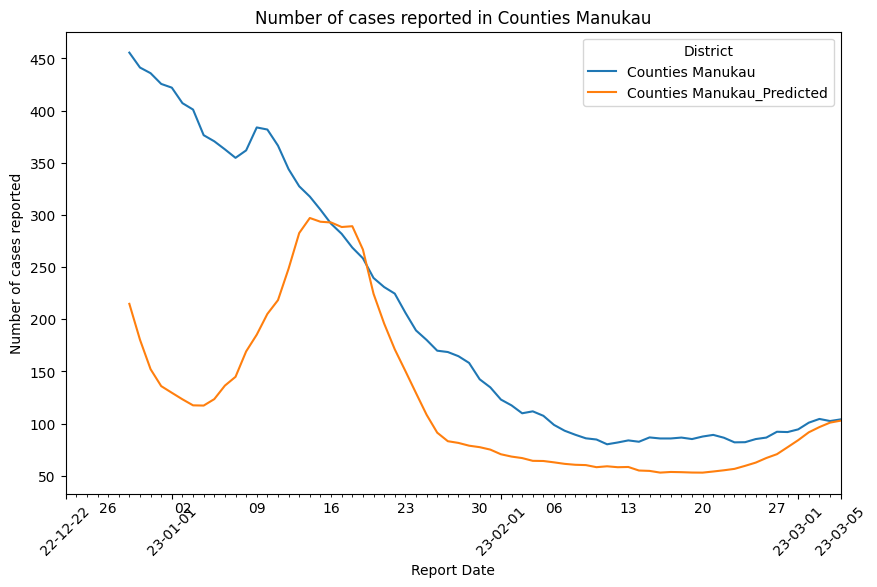

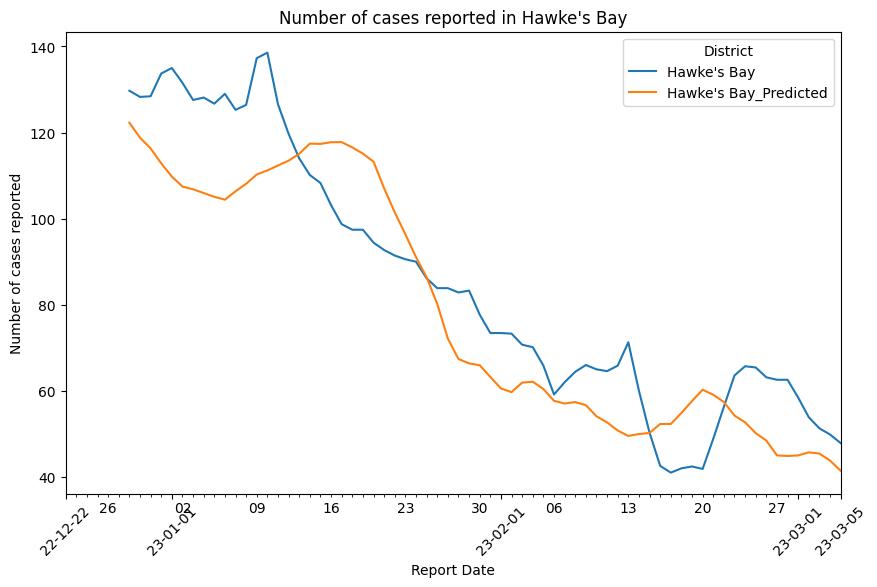

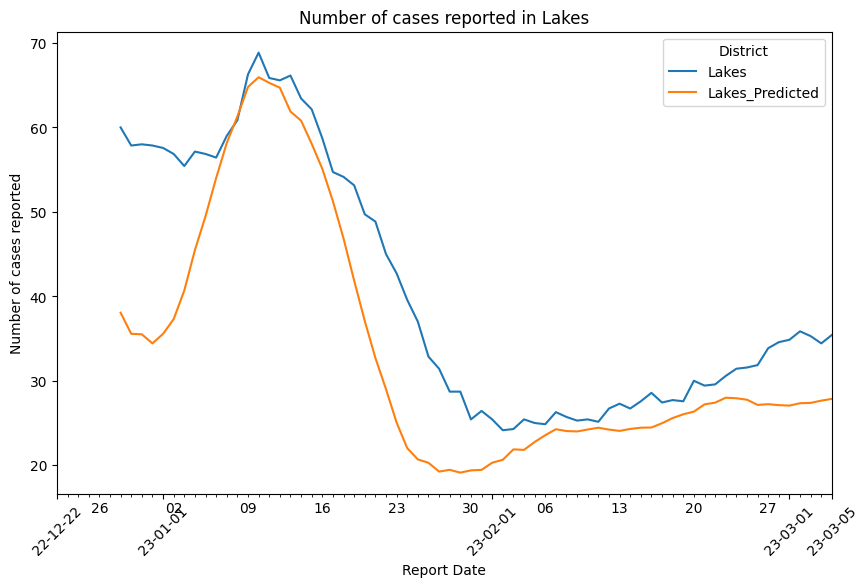

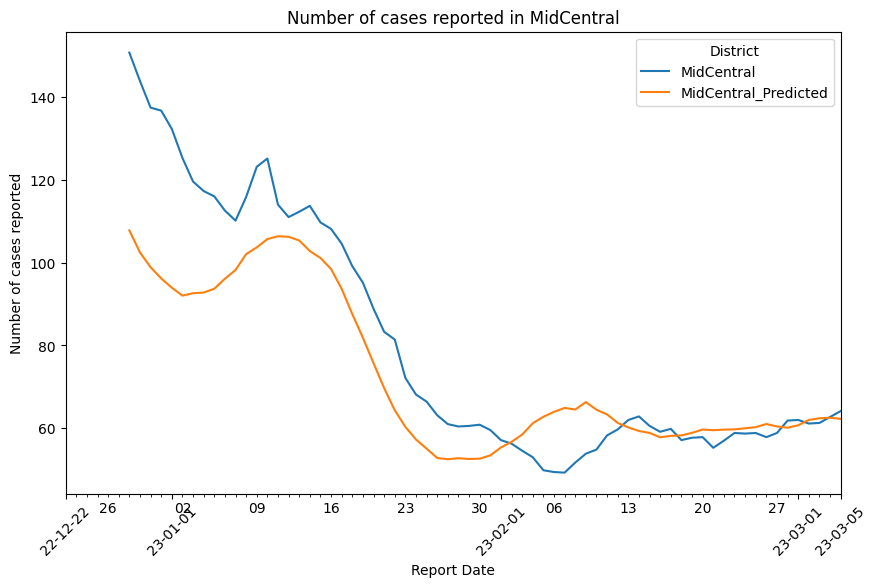

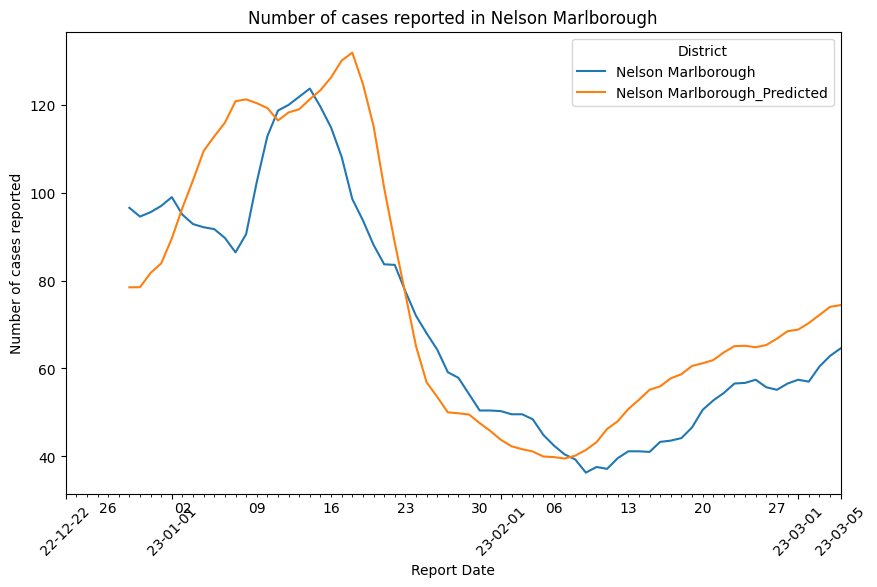

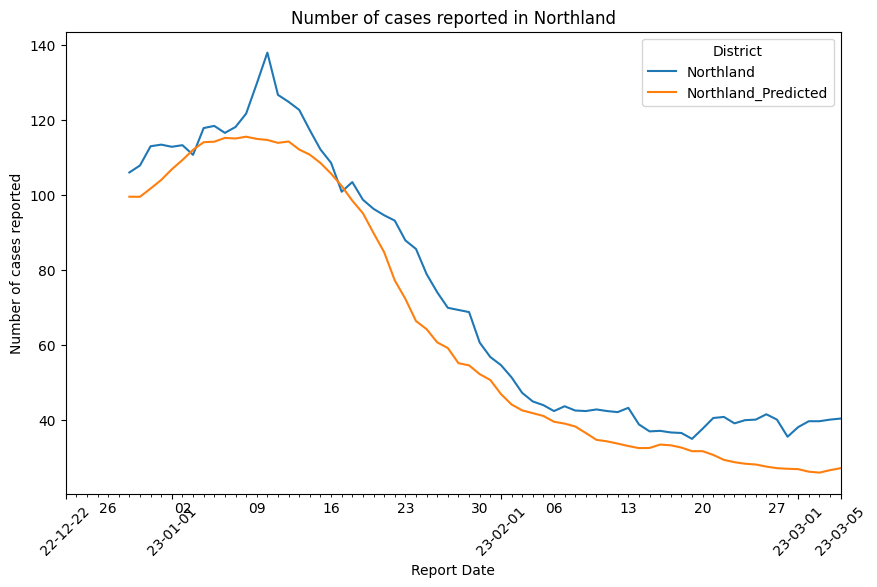

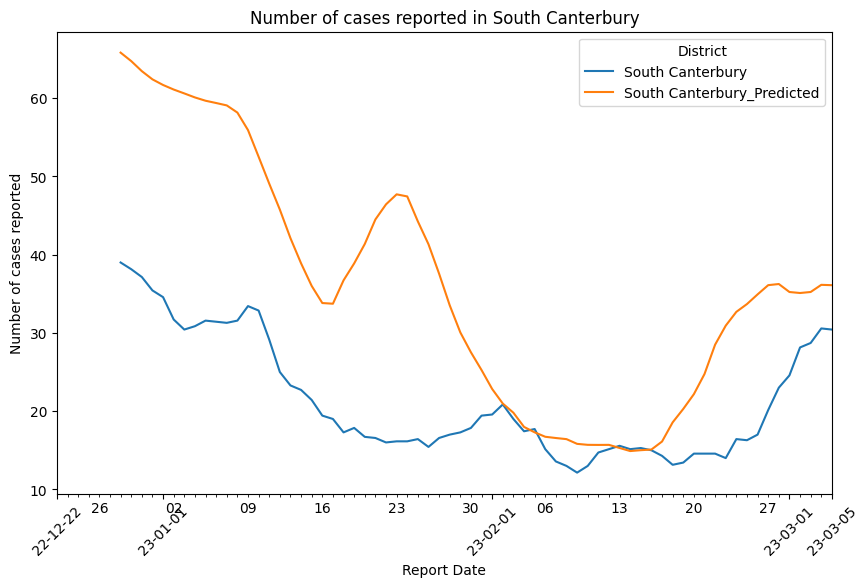

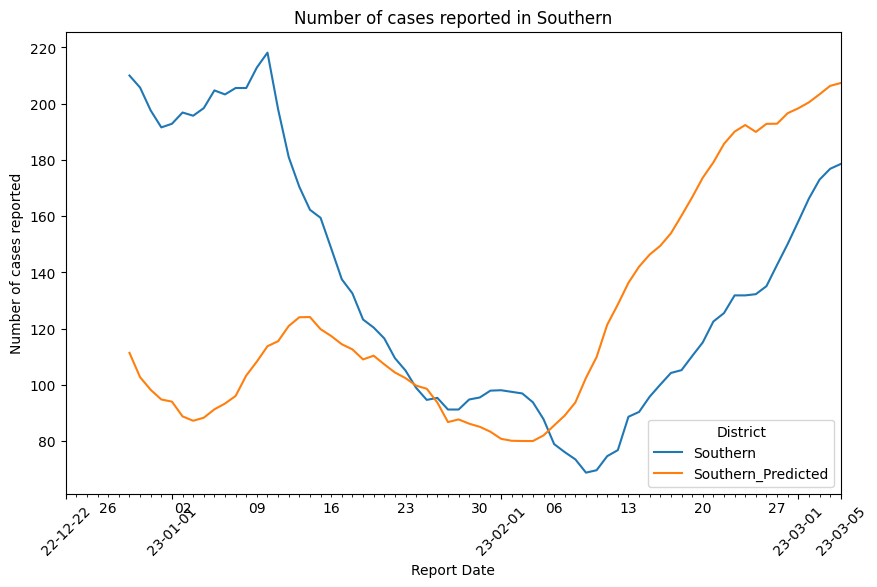

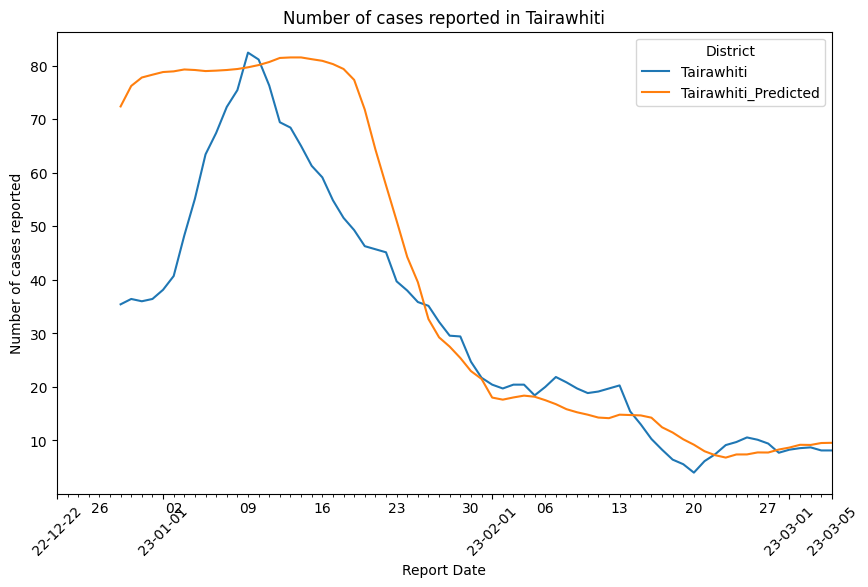

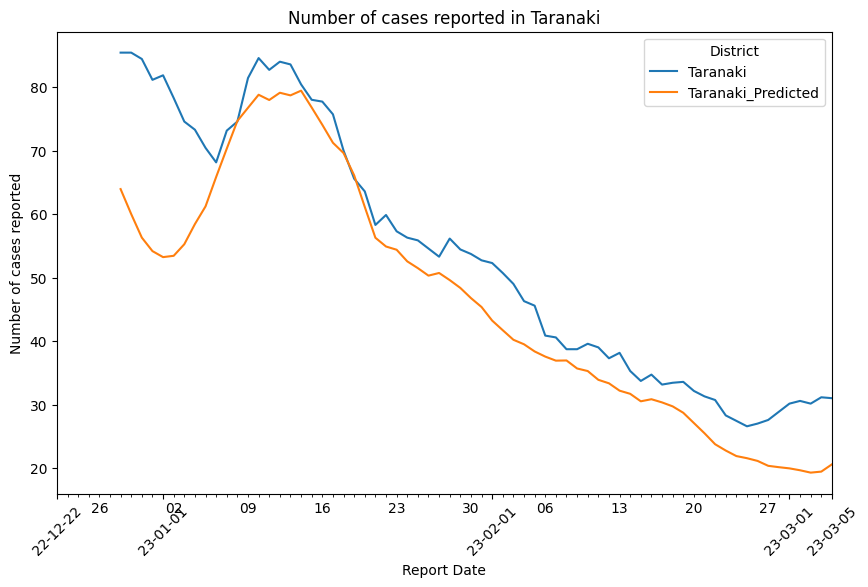

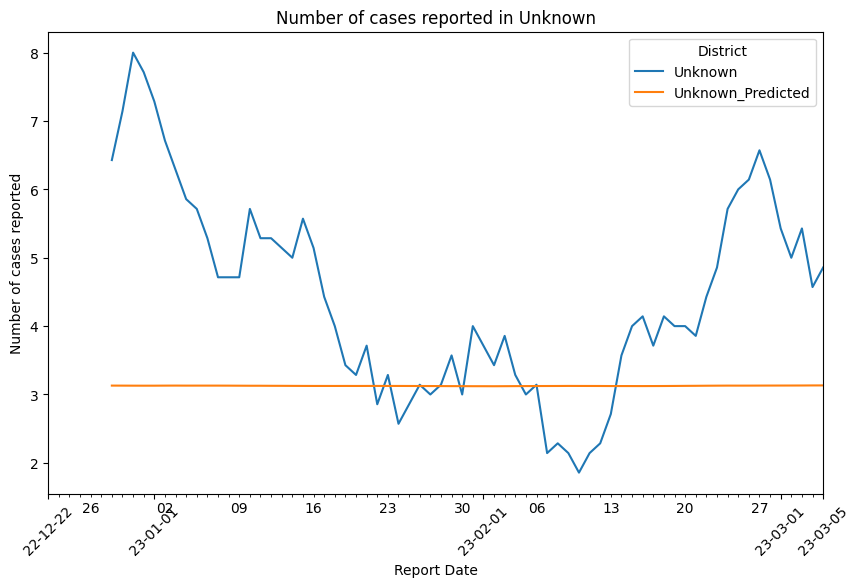

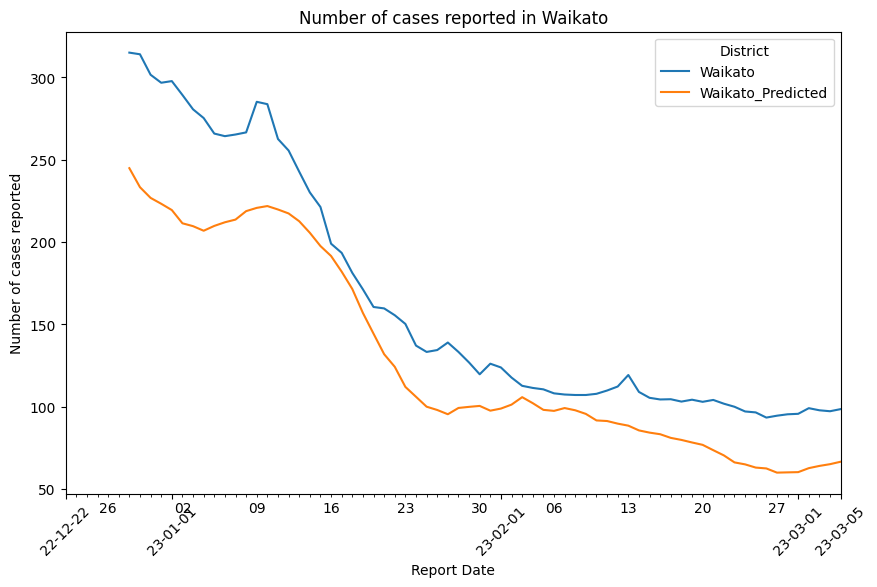

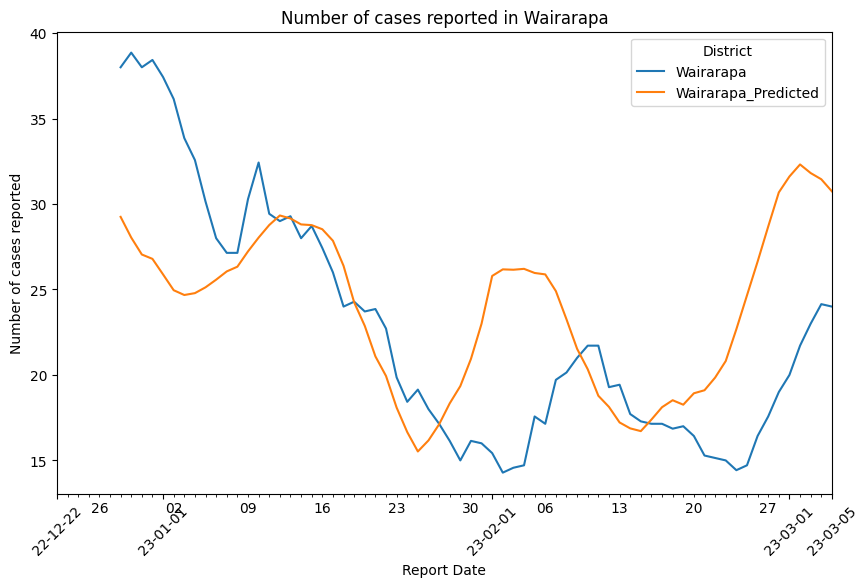

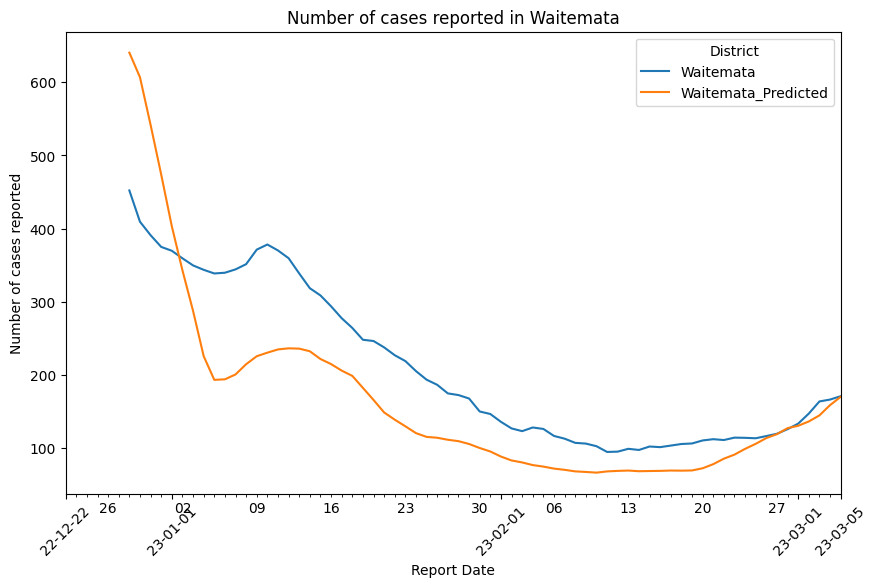

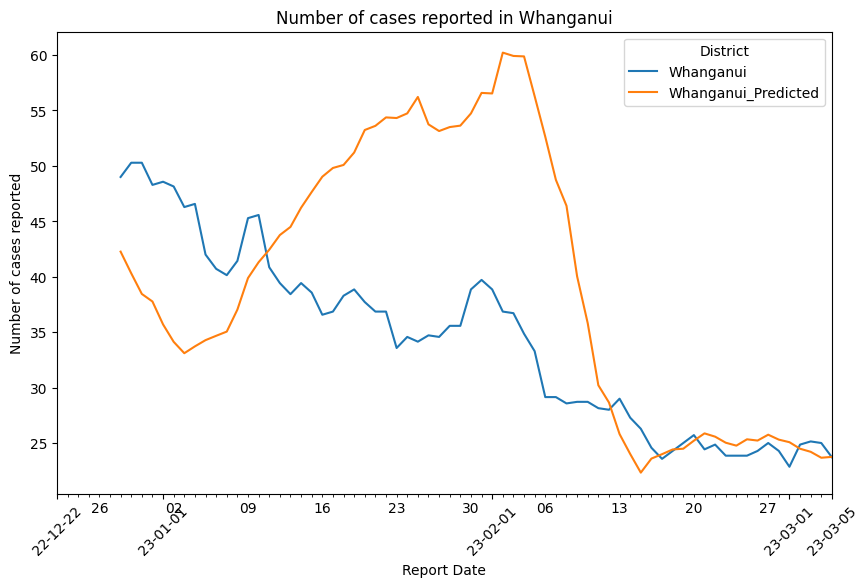

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the data from the CSV file
data = pd.read_csv('dataset/modelling_data/cases/covid-case-counts.csv', low_memory=False)

# Convert 'Report Date' column to datetime format
data['Report Date'] = pd.to_datetime(data['Report Date'])

# Filter the data to include only the 109 days before 2023-03-22
start_date = pd.to_datetime('2023-03-22') - pd.Timedelta(days=90)
end_date = start_date + pd.Timedelta(days=73)
filtered_data = data[(data['Report Date'] >= start_date) & (data['Report Date'] <= end_date)]

# Group the data by date and district and sum the number of cases reported
grouped_data = filtered_data.groupby(['Report Date', 'District'])['Number of cases reported'].sum().reset_index()

# Pivot the data to make the districts as columns and the dates as rows
pivoted_data = grouped_data.pivot(index='Report Date', columns='District', values='Number of cases reported').fillna(0)
pivoted_data = pivoted_data.rolling(7).mean()
# Read the predictions from the CSV file
predict_data = pd.read_csv('StemGNN/output/covid-case-counts-processed/test/predict.csv')
# Get the number of districts and reshape the predictions to match the original data format
num_districts = len(pivoted_data.columns)
predict_data_reshaped = predict_data.values.reshape(-1, num_districts)

predict_start_idx = pivoted_data.index.get_loc(start_date)

# Create a DataFrame for the predicted data with the same columns and index as the original data
predicted_data = pivoted_data.iloc[predict_start_idx:predict_start_idx + 74].copy()

# Fill the predicted_data DataFrame with the predicted values
for i, district in enumerate(pivoted_data.columns):
    predicted_data[district] = pd.Series(predict_data_reshaped[:, i], index=predicted_data.index)
predicted_data = predicted_data.rolling(7).mean()
# Plot the original ground truth and the predicted values together
for i in range(0, num_districts):
    district = pivoted_data.columns[i]
    # Set the plot size
    fig, ax = plt.subplots(figsize=(10, 6))
    district_data = pivoted_data[[district]].join(predicted_data[[district]], rsuffix='_Predicted')
    district_data.plot(kind='line', ax=ax)
    ax.set_title(f'Number of cases reported in {district}')
    ax.set_xlabel('Report Date')
    ax.set_ylabel('Number of cases reported')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
    ax.tick_params(axis='x', labelrotation=45)
    plt.show()